0:[ 1.39839207 -0.60753358 -0.0967867   0.17055818]
1:[ 1.95247311 -0.90220981 -0.0967151   0.21267732]
2:[ 2.28184241 -1.09855325 -0.09177595  0.22913585]
3:[ 2.5085655  -1.24106388 -0.08910103  0.23651836]
4:[ 2.67621542 -1.34913352 -0.08869227  0.24003578]
5:[ 2.80538508 -1.43345537 -0.08975447  0.24175047]
6:[ 2.90754346 -1.50059518 -0.09162279  0.24257701]
7:[ 2.98979615 -1.55486307 -0.09385403  0.24295079]
8:[ 3.05687941 -1.59923008 -0.09617726  0.24308967]
9:[ 3.11211968 -1.63582408 -0.09843679  0.24310679]
10:[ 3.15794542 -1.66621678 -0.10054955  0.24306244]
11:[ 3.19618258 -1.69159862 -0.10247685  0.24298933]
12:[ 3.22823605 -1.71288996 -0.10420639  0.2429053 ]
13:[ 3.2552067  -1.73081446 -0.10574097  0.24281999]
14:[ 3.27797006 -1.74594913 -0.10709166  0.24273846]
15:[ 3.29723087 -1.75875933 -0.10827355  0.24266317]
16:[ 3.31356205 -1.76962397 -0.10930324  0.2425951 ]
17:[ 3.32743328 -1.77885409 -0.11019739  0.24253443]
18:[ 3.33923222 -1.78670665 -0.1109719   0.24248086]
19:

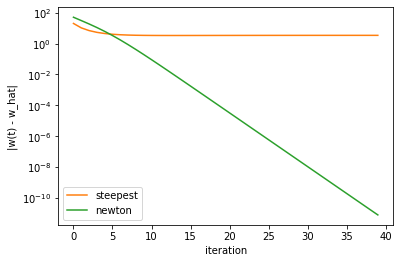

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#dataset4
n = 200
x_d4 = 3 * (np.random.rand(n, 4) - 0.5)
y_d4 = (2 * x_d4[:, 0] - 1 * x_d4[:,1] + 0.5 + 0.5 * np.random.randn(n)) > 0
y_d4 = 2 * y_d4 -1

#def sigmoid function
def sigmoid(z):
    return 1/(1 + np.exp(-z))

w = np.zeros(len(x_d4[0]))
l_r = 0.0002
lamb = 0.002
loss = []
times=0
#grad
for iteration in range(0,50):
    for x,y in zip(x_d4,y_d4):
        a = np.zeros(len(x))
        for x,y in zip(x_d4,y_d4):
            a += -np.dot(x,y) * (1 - sigmoid(np.dot(np.dot(y, w), x)))
            a += 2 * lamb * w
        grad=(-a)
        temp = np.dot(w,x)

        k=temp>0 if 1 else -1
        w = w + l_r * grad
    for x,y in zip(x_d4,y_d4):
        temp += np.log(1 / sigmoid(np.dot(np.dot(y,w), x))) + lamb * np.dot(w,w)
    loss.append(temp)
    print("%d:%s" %(times,w))
    times+=1

#newton
w = np.zeros(len(x_d4[0]))
l_r = 0.002
lamb = 0.002
loss_new = []
times=0
for iteration in range(0,50):
    for x,y in zip(x_d4, y_d4):
        temp = np.dot(w,x)
        a = np.zeros(len(x))
        for x,y in zip(x_d4,y_d4):
            a += -np.dot(x,y) * (1 - sigmoid(np.dot(np.dot(y, w), x)))
            a += 2 * lamb * w
        grad=(-a)
        h_m = np.zeros((len(x_d4[0]),len(x_d4[0])))
        I_m = np.identity(len(x_d4[0]))        
        for x,y in zip(x_d4, y_d4):
            h_m += (sigmoid(np.dot(np.dot(y,w), x)) - sigmoid(np.dot(np.dot(y,w), x)) ** 2) * np.dot(np.reshape(x, (4,1)),np.reshape(x, (1,4)))
            h_m += 2 * lamb * I_m
        w += l_r * np.dot(np.linalg.inv(h_m),grad)

    temp=0
    for x,y in zip(x_d4,y_d4):
        temp += np.log(1 / sigmoid(np.dot(np.dot(y,w), x))) + lamb * np.dot(w,w)
    loss_new.append(temp)
    print("%d:%s" %(times,w))
    times+=1

ds = [loss[i]-loss_new[49] for i in range(0,50)]
dn = [loss_new[i] - loss_new[49] for i in range(0,50)]
iteration=[]
for i in range(0,40):
    iteration.append(i)
    




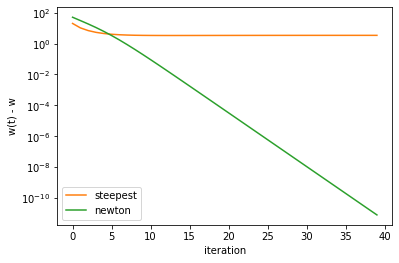

In [2]:
plt.semilogy(y)
plt.plot(iteration, ds[:40], label = 'steepest')
plt.plot(iteration, dn[:40], label ='newton')
plt.xlabel('iteration')
plt.ylabel('w(t) - w')
plt.legend()